In [1]:
#Importing Libraries
#Matplotlib AND seaborn for Visualization
#Numpy for Mathematical
#Pandas for Excel/CSV Sheets Handling
#Tensorflow and Sklearn for Machine Learning

import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

np.set_printoptions(precision=3, suppress=True)
print(tf.__version__)

2.3.0


In [2]:
#Loading Dataset
raw_dataset = pd.read_excel("Dataset.xlsx", na_values='?')
PROJECT = raw_dataset['Project']
del raw_dataset['Project']
column_names = raw_dataset.columns
print(raw_dataset)
#Splitting X as INPUT and Y as OUTPUT
X_values = raw_dataset.iloc[:, 0:5].values
y_values = raw_dataset.iloc[:, 5].values
print(column_names)

    Complexity  Financial  Performance  Schedule  User  OUTPUT
0         0.00       0.01         0.08      0.04  0.04   0.030
1         0.01       0.01         0.01      0.02  0.00   0.010
2         0.08       0.02         0.01      0.04  0.01   0.032
3         0.06       0.01         0.01      0.02  0.02   0.024
4         0.42       0.15         0.04      0.00  0.21   0.160
5         0.04       0.05         0.20      0.00  0.04   0.066
6         0.02       0.04         0.30      0.12  0.10   0.116
7         0.02       0.00         0.20      0.18  0.00   0.080
8         0.24       0.00         0.16      0.00  0.05   0.090
9         0.03       0.28         0.12      0.40  0.25   0.216
10        0.12       0.08         0.03      0.01  0.04   0.056
11        0.03       0.06         0.09      0.04  0.06   0.056
12        0.12       0.08         0.03      0.01  0.04   0.056
13        0.03       0.06         0.09      0.04  0.06   0.060
14        0.03       0.06         0.09      0.04  0.03 

In [3]:
#Making a Copy of Original Dataset
dataset = raw_dataset.copy()
dataset.tail()

,Complexity,Financial,Performance,Schedule,User,OUTPUT
13,0.03,0.06,0.09,0.04,0.06,0.060
14,0.03,0.06,0.09,0.04,0.03,0.050
15,0.12,0.08,0.03,0.01,0.04,0.056
16,0.01,0.06,0.04,0.06,0.02,0.038
17,0.06,0.15,0.02,0.21,0.10,0.108


In [4]:
#Checking if there are NULL Values
dataset.isna().sum()

Complexity     0
Financial      0
Performance    0
Schedule       0
User           0
OUTPUT         0
dtype: int64

In [5]:
#Deleting NULL Values
dataset = dataset.dropna()

In [6]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
print(dataset.tail())
print(dataset.columns)

    Complexity  Financial  Performance  Schedule  User  OUTPUT
13        0.03       0.06         0.09      0.04  0.06   0.060
14        0.03       0.06         0.09      0.04  0.03   0.050
15        0.12       0.08         0.03      0.01  0.04   0.056
16        0.01       0.06         0.04      0.06  0.02   0.038
17        0.06       0.15         0.02      0.21  0.10   0.108
Index(['Complexity', 'Financial', 'Performance', 'Schedule', 'User', 'OUTPUT'], dtype='object')


In [7]:
#Splitting Dataset for Training and Testing, 80% for Training
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

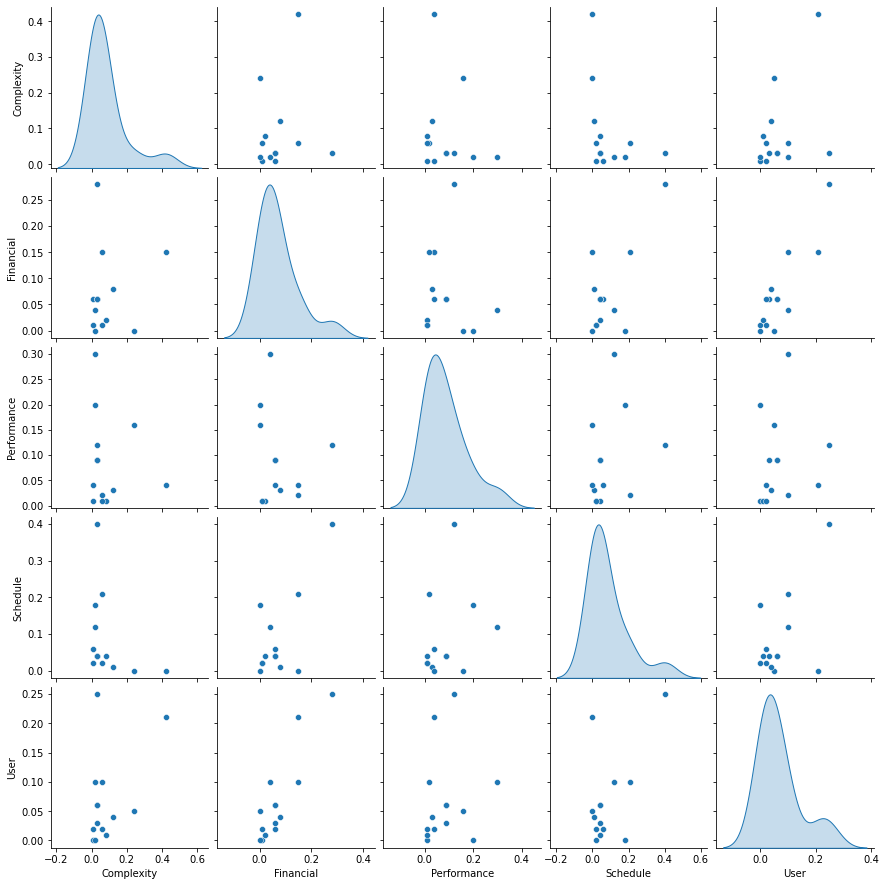

In [8]:
#Visualizing Data to Visualize Relation between Each Column with Other Columns
sns.pairplot(train_dataset[['Complexity', 'Financial', 'Performance', 'Schedule','User']], diag_kind='kde')

In [9]:
#Compiling Sum/mean etc for Dataset
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Complexity,14.0,0.082857,0.114518,0.01,0.0225,0.030,0.0750,0.420
Financial,14.0,0.070000,0.077360,0.00,0.0125,0.060,0.0750,0.280
Performance,14.0,0.086429,0.085269,0.01,0.0225,0.065,0.1125,0.300
Schedule,14.0,0.084286,0.111749,0.00,0.0200,0.040,0.1050,0.400
User,14.0,0.067857,0.076075,0.00,0.0200,0.045,0.0900,0.250
OUTPUT,14.0,0.078286,0.056562,0.01,0.0410,0.058,0.1035,0.216


In [10]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Complexity,0.082857,0.114518
Financial,0.070000,0.077360
Performance,0.086429,0.085269
Schedule,0.084286,0.111749
User,0.067857,0.076075
OUTPUT,0.078286,0.056562


In [11]:
#Reshaping Values for ANN
print("X",X_values)
y_values_reshaped = np.reshape(y_values, (-1,1))
print("To BE PREDICTED", y_values)

X [[0.   0.01 0.08 0.04 0.04]
 [0.01 0.01 0.01 0.02 0.  ]
 [0.08 0.02 0.01 0.04 0.01]
 [0.06 0.01 0.01 0.02 0.02]
 [0.42 0.15 0.04 0.   0.21]
 [0.04 0.05 0.2  0.   0.04]
 [0.02 0.04 0.3  0.12 0.1 ]
 [0.02 0.   0.2  0.18 0.  ]
 [0.24 0.   0.16 0.   0.05]
 [0.03 0.28 0.12 0.4  0.25]
 [0.12 0.08 0.03 0.01 0.04]
 [0.03 0.06 0.09 0.04 0.06]
 [0.12 0.08 0.03 0.01 0.04]
 [0.03 0.06 0.09 0.04 0.06]
 [0.03 0.06 0.09 0.04 0.03]
 [0.12 0.08 0.03 0.01 0.04]
 [0.01 0.06 0.04 0.06 0.02]
 [0.06 0.15 0.02 0.21 0.1 ]]
To BE PREDICTED [0.03  0.01  0.032 0.024 0.16  0.066 0.116 0.08  0.09  0.216 0.056 0.056
 0.056 0.06  0.05  0.056 0.038 0.108]


In [12]:
#Normalizing Values to lower the Training Effort
print("Normalization Vector For X:", scaler_x.fit(X_values))
xscale=scaler_x.transform(X_values)
print("\nNormalization Vector For Y:",scaler_y.fit(y_values_reshaped))
yscale=scaler_y.transform(y_values_reshaped)

Normalization Vector For X: MinMaxScaler()

Normalization Vector For Y: MinMaxScaler()


In [13]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [14]:
print("X Training Data:", X_train)
print("'\nX Testing Data:", X_test)

X Training Data: [[0.    0.036 0.241 0.1   0.16 ]
 [0.143 0.536 0.034 0.525 0.4  ]
 [0.024 0.036 0.    0.05  0.   ]
 [0.143 0.036 0.    0.05  0.08 ]
 [0.071 0.214 0.276 0.1   0.24 ]
 [0.19  0.071 0.    0.1   0.04 ]
 [0.571 0.    0.517 0.    0.2  ]
 [0.048 0.    0.655 0.45  0.   ]
 [0.071 0.214 0.276 0.1   0.24 ]
 [0.286 0.286 0.069 0.025 0.16 ]
 [0.286 0.286 0.069 0.025 0.16 ]
 [0.071 1.    0.379 1.    1.   ]
 [0.286 0.286 0.069 0.025 0.16 ]]
'
X Testing Data: [[0.071 0.214 0.276 0.1   0.12 ]
 [0.048 0.143 1.    0.3   0.4  ]
 [0.024 0.214 0.103 0.15  0.08 ]
 [0.095 0.179 0.655 0.    0.16 ]
 [1.    0.536 0.103 0.    0.84 ]]


In [15]:
#ANN Model with 5 VALUES INPUT, 2 HIDDEN DENSE LAYERS, 1 OUTPUT LAYER WITH LINEAR ACTIVATION TO MATCH DATA PATTERNS
model = Sequential()
model.add(Dense(12, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                72        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Compiling ANN Model with Mean Squared Error
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [17]:
#Start and Train the Model and Store the History
history = model.fit(X_train, y_train, epochs=300, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/300
1/1 [==============================] - 0s 119ms/step - loss: 0.0688 - mse: 0.0688 - mae: 0.2183 - val_loss: 0.3606 - val_mse: 0.3606 - val_mae: 0.4780
Epoch 2/300
1/1 [==============================] - 0s 13ms/step - loss: 0.0668 - mse: 0.0668 - mae: 0.2147 - val_loss: 0.3555 - val_mse: 0.3555 - val_mae: 0.4735
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 0.0649 - mse: 0.0649 - mae: 0.2112 - val_loss: 0.3507 - val_mse: 0.3507 - val_mae: 0.4690
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 0.0632 - mse: 0.0632 - mae: 0.2077 - val_loss: 0.3459 - val_mse: 0.3459 - val_mae: 0.4643
Epoch 5/300
1/1 [==============================] - 0s 12ms/step - loss: 0.0615 - mse: 0.0615 - mae: 0.2044 - val_loss: 0.3412 - val_mse: 0.3412 - val_mae: 0.4595
Epoch 6/300
1/1 [==============================] - 0s 12ms/step - loss: 0.0598 - mse: 0.0598 - mae: 0.2013 - val_loss: 0.3367 - val_mse: 0.3367 - val_mae: 0.4550
Epoch 7/300
1/1 [==========

1/1 [==============================] - 0s 12ms/step - loss: 0.0099 - mse: 0.0099 - mae: 0.0838 - val_loss: 0.0952 - val_mse: 0.0952 - val_mae: 0.1893
Epoch 102/300
1/1 [==============================] - 0s 13ms/step - loss: 0.0098 - mse: 0.0098 - mae: 0.0835 - val_loss: 0.0946 - val_mse: 0.0946 - val_mae: 0.1886
Epoch 103/300
1/1 [==============================] - 0s 13ms/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0832 - val_loss: 0.0940 - val_mse: 0.0940 - val_mae: 0.1879
Epoch 104/300
1/1 [==============================] - 0s 12ms/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0829 - val_loss: 0.0933 - val_mse: 0.0933 - val_mae: 0.1871
Epoch 105/300
1/1 [==============================] - 0s 13ms/step - loss: 0.0096 - mse: 0.0096 - mae: 0.0826 - val_loss: 0.0926 - val_mse: 0.0926 - val_mae: 0.1863
Epoch 106/300
1/1 [==============================] - 0s 13ms/step - loss: 0.0095 - mse: 0.0095 - mae: 0.0823 - val_loss: 0.0918 - val_mse: 0.0918 - val_mae: 0.1854
Epoch 107/300
1/1 [===========

1/1 [==============================] - 0s 14ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0561 - val_loss: 0.0362 - val_mse: 0.0362 - val_mae: 0.1199
Epoch 152/300
1/1 [==============================] - 0s 12ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0554 - val_loss: 0.0353 - val_mse: 0.0353 - val_mae: 0.1182
Epoch 153/300
1/1 [==============================] - 0s 13ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0547 - val_loss: 0.0345 - val_mse: 0.0345 - val_mae: 0.1165
Epoch 154/300
1/1 [==============================] - 0s 12ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0540 - val_loss: 0.0336 - val_mse: 0.0336 - val_mae: 0.1148
Epoch 155/300
1/1 [==============================] - 0s 13ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0533 - val_loss: 0.0328 - val_mse: 0.0328 - val_mae: 0.1131
Epoch 156/300
1/1 [==============================] - 0s 12ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0526 - val_loss: 0.0320 - val_mse: 0.0320 - val_mae: 0.1115
Epoch 157/300
1/1 [===========

1/1 [==============================] - 0s 12ms/step - loss: 9.6913e-04 - mse: 9.6913e-04 - mae: 0.0234 - val_loss: 0.0085 - val_mse: 0.0085 - val_mae: 0.0538
Epoch 202/300
1/1 [==============================] - 0s 13ms/step - loss: 9.3454e-04 - mse: 9.3454e-04 - mae: 0.0229 - val_loss: 0.0082 - val_mse: 0.0082 - val_mae: 0.0529
Epoch 203/300
1/1 [==============================] - 0s 12ms/step - loss: 9.0117e-04 - mse: 9.0117e-04 - mae: 0.0224 - val_loss: 0.0080 - val_mse: 0.0080 - val_mae: 0.0520
Epoch 204/300
1/1 [==============================] - 0s 13ms/step - loss: 8.6900e-04 - mse: 8.6900e-04 - mae: 0.0218 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0512
Epoch 205/300
1/1 [==============================] - 0s 12ms/step - loss: 8.3801e-04 - mse: 8.3801e-04 - mae: 0.0213 - val_loss: 0.0076 - val_mse: 0.0076 - val_mae: 0.0503
Epoch 206/300
1/1 [==============================] - 0s 13ms/step - loss: 8.0816e-04 - mse: 8.0816e-04 - mae: 0.0208 - val_loss: 0.0073 - val_mse: 0.0073 

Epoch 249/300
1/1 [==============================] - 0s 13ms/step - loss: 2.6295e-04 - mse: 2.6295e-04 - mae: 0.0103 - val_loss: 0.0028 - val_mse: 0.0028 - val_mae: 0.0328
Epoch 250/300
1/1 [==============================] - 0s 13ms/step - loss: 2.6064e-04 - mse: 2.6064e-04 - mae: 0.0102 - val_loss: 0.0028 - val_mse: 0.0028 - val_mae: 0.0325
Epoch 251/300
1/1 [==============================] - 0s 13ms/step - loss: 2.5843e-04 - mse: 2.5843e-04 - mae: 0.0102 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0323
Epoch 252/300
1/1 [==============================] - 0s 13ms/step - loss: 2.5633e-04 - mse: 2.5633e-04 - mae: 0.0101 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0321
Epoch 253/300
1/1 [==============================] - 0s 12ms/step - loss: 2.5430e-04 - mse: 2.5430e-04 - mae: 0.0101 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0319
Epoch 254/300
1/1 [==============================] - 0s 13ms/step - loss: 2.5236e-04 - mse: 2.5236e-04 - mae: 0.0101 - val_loss: 0.0027 - va

In [38]:
#Saving the Model Weights
model.save("RiskAnalysis")

INFO:tensorflow:Assets written to: RiskAnalysis\assets


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


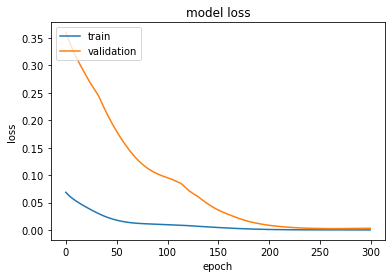

In [18]:
#Plotting the Error between Training Data
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_mse'])
# plt.plot(history.history['val_mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

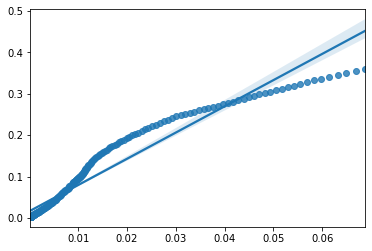

In [33]:
#Plotting the Error Values
sns.regplot(x=history.history['loss'], y=history.history['val_loss'], data=history.history);

[0.032875843, 0.017170666, 0.030135628, 0.023684189, 0.15364856, 0.06510482, 0.10528449, 0.07957403, 0.09023298, 0.19596612, 0.05653583, 0.056642935, 0.05653583, 0.056642935, 0.05087705, 0.05653583, 0.03748419, 0.10866511]


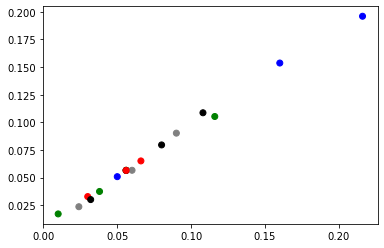

In [39]:
#Load the Saved Model
model = keras.models.load_model("RiskAnalysis")

def PredictByModel(arr):
    Xnew= scaler_x.transform(arr)
    ynew= model.predict(Xnew)
    #invert normalize
    ynew = scaler_y.inverse_transform(ynew) 
    Xnew = scaler_x.inverse_transform(Xnew)
#     print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
    return ynew[0]

#Predicting with Model Values
Predicted = []
Original = []
for row in raw_dataset.iterrows():
    arr = np.array([[row[1]["Complexity"],row[1]["Financial"],row[1]["Performance"],row[1]["Schedule"],row[1]["User"]]])
    PredictedValue = PredictByModel(arr)
    Original.append(row[1]["OUTPUT"])
    Predicted.append(PredictedValue[0])

colormap = ['red','green','black','grey','blue','red','green','black','grey','blue','red','green','black','grey','blue','red','green','black']
plt.scatter(Original,Predicted,color=colormap)
print(Predicted)

In [40]:
#Predicting with Model Values for Only One Project
def PredictByModel(arr):
    Xnew= scaler_x.transform(arr)
    ynew= model.predict(Xnew)
    #invert normalize
    ynew = scaler_y.inverse_transform(ynew) 
    Xnew = scaler_x.inverse_transform(Xnew)
    print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
    return ynew[0]


#np.array([[Complexity,Finance,Perormace,Schedule,User]])

PredictedValue = PredictByModel(arr)

X=[0.08 0.17 0.04 0.32 0.5 ], Predicted=[0.188]
